# Explore runs

Load and explore embeddings from different methods

TODO:
1. test performance

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

plt.style.use("seaborn-v0_8-whitegrid")

import sys
from pathlib import Path

sys.path.append(str(Path().absolute().parent))

import utilities

Models summary

In [2]:
import mlflow

experiment = mlflow.get_experiment_by_name("movie_lens_rating_prediction")
runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
runs_df = pl.DataFrame(runs_df)

start_cols = [
    "tags.mlflow.runName",
    "params.layer_sizes",
    "params.embedding_dim",
    "params.learning_rate",
    "metrics.epoch",
    "metrics.train_loss_epoch",
    "metrics.val_loss_epoch",
    "metrics.test_loss_epoch",
]
runs_df.select(
    start_cols + [col for col in runs_df.columns if col not in start_cols]
).sort("metrics.val_loss_epoch")

tags.mlflow.runName,params.layer_sizes,params.embedding_dim,params.learning_rate,metrics.epoch,metrics.train_loss_epoch,metrics.val_loss_epoch,metrics.test_loss_epoch,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.train_loss_step,metrics.val_loss_step,metrics.test_loss_step,metrics.running_mean_epoch,metrics.running_mean_step,params.n_users,params.n_movies,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type
str,str,str,str,f64,f64,f64,f64,str,str,str,str,"datetime[ns, UTC]","datetime[ns, UTC]",f64,f64,f64,f64,f64,str,str,str,str,str
"""nn_colab_filter_non_linear_202…","""[10, 16, 16, 16]""","""5""","""0.005""",8.0,0.575203,0.683122,0.69046,"""279967b6a0e04b87a647d9fb1978bc…","""548785546609954188""","""FINISHED""","""/Users/stantoon/Documents/Vari…",2025-01-03 16:15:20.091 UTC,2025-01-03 16:18:37.701 UTC,0.562218,0.667108,0.632752,null,null,"""157481""","""50""","""stantoon""","""/Users/stantoon/Documents/Vari…","""LOCAL"""
"""nn_colab_filter_non_linear""","""[10, 32, 16]""","""5""","""0.005""",10.0,0.553263,0.686721,0.692531,"""c6ea1003fba24d60bcf76b6ade3e4d…","""548785546609954188""","""FINISHED""","""/Users/stantoon/Documents/Vari…",2025-01-03 16:06:37.610 UTC,2025-01-03 16:10:41.429 UTC,0.550876,0.663941,0.624704,null,null,"""157481""","""50""","""stantoon""","""/Users/stantoon/Documents/Vari…","""LOCAL"""
"""nn_colab_filter_linear""",null,"""5""","""0.005""",10.0,0.596353,0.689189,0.696053,"""810f0251cd224736af423a49add084…","""548785546609954188""","""FINISHED""","""/Users/stantoon/Documents/Vari…",2025-01-03 15:47:43.362 UTC,2025-01-03 15:51:36.666 UTC,0.60917,0.670025,0.635586,null,null,"""157481""","""50""","""stantoon""","""/Users/stantoon/Documents/Vari…","""LOCAL"""
"""nn_colab_filter_non_linear_202…","""[40, 16, 16, 16]""","""20""","""0.005""",8.0,0.527207,0.703884,0.712426,"""159454faf49f44ae997e83a72fb9ef…","""548785546609954188""","""FINISHED""","""/Users/stantoon/Documents/Vari…",2025-01-03 16:21:01.271 UTC,2025-01-03 16:24:39.991 UTC,0.563091,0.704185,0.636437,null,null,"""157481""","""50""","""stantoon""","""/Users/stantoon/Documents/Vari…","""LOCAL"""
"""nn_inner""",null,"""5""","""0.005""",13.0,0.491839,0.75777,0.764444,"""954ab9584e474a59acbcfa89e31756…","""548785546609954188""","""FINISHED""","""/Users/stantoon/Documents/Vari…",2025-01-03 15:27:15.519 UTC,2025-01-03 15:32:58.294 UTC,0.49926,0.719026,0.709034,null,null,"""157481""","""50""","""stantoon""","""/Users/stantoon/Documents/Vari…","""LOCAL"""
"""nn_colab_filter_non_linear_202…","""[40, 16, 16, 16]""","""20""","""0.005""",22.0,0.375483,0.802818,0.810343,"""e85b677c3c9a4caba6a9ce08572fa6…","""548785546609954188""","""FINISHED""","""/Users/stantoon/Documents/Vari…",2025-01-03 17:02:06.189 UTC,2025-01-03 17:18:46.378 UTC,0.426075,0.758802,0.79079,null,null,"""157481""","""50""","""stantoon""","""/Users/stantoon/Documents/Vari…","""LOCAL"""
"""global_mean""",null,null,"""0.1""",2.0,0.903731,0.898837,0.906213,"""c3f801aac2494b6cacfafd69e0ee4b…","""548785546609954188""","""FINISHED""","""/Users/stantoon/Documents/Vari…",2025-01-03 15:34:17.775 UTC,2025-01-03 15:35:08.310 UTC,0.91259,0.79787,0.784174,3.979776,3.97883,null,null,"""stantoon""","""/Users/stantoon/Documents/Vari…","""LOCAL"""


Plot training logs

epoch,step,dataset,loss,name
u32,i64,str,f64,str
1,434,"""train_loss""",0.915455,"""nn_colab_filter_non_linear_202…"
2,869,"""train_loss""",0.719124,"""nn_colab_filter_non_linear_202…"
3,1304,"""train_loss""",0.641523,"""nn_colab_filter_non_linear_202…"
4,1739,"""train_loss""",0.610411,"""nn_colab_filter_non_linear_202…"
5,2174,"""train_loss""",0.586742,"""nn_colab_filter_non_linear_202…"
…,…,…,…,…
9,3914,"""val_loss""",0.751022,"""nn_inner"""
10,4349,"""val_loss""",0.749691,"""nn_inner"""
11,4784,"""val_loss""",0.749204,"""nn_inner"""


/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_47851/621457871.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


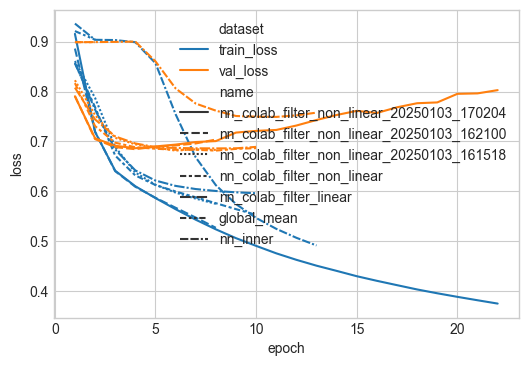

In [3]:
plot_df = utilities.get_training_logs_for_experiment("movie_lens_rating_prediction")
display(plot_df)


fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=plot_df, x="epoch", y="loss", style="name", hue="dataset", ax=ax)
fig.show()

Dataset losses

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_47851/1685359539.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


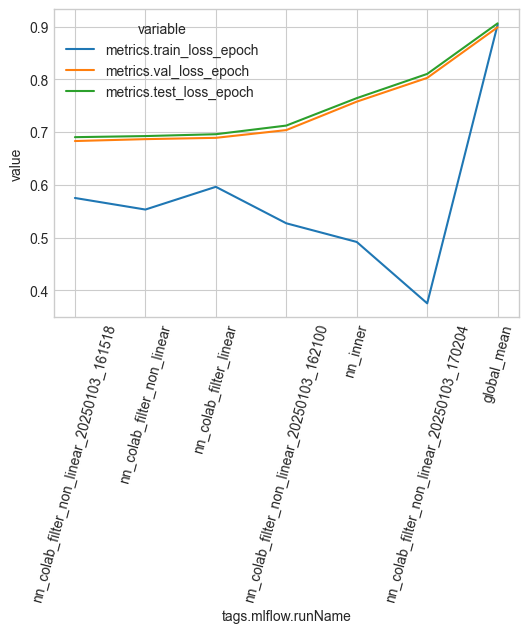

In [4]:
plot_df = runs_df.sort("metrics.val_loss_epoch").unpivot(
    index="tags.mlflow.runName",
    on=[
        "metrics.train_loss_epoch",
        "metrics.val_loss_epoch",
        "metrics.test_loss_epoch",
    ],
)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=plot_df, x="tags.mlflow.runName", y="value", hue="variable", ax=ax)
ax.tick_params(axis="x", labelrotation=75)
fig.show()